In [37]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [38]:

pre_name = "box_plot_v2"
path_project = Path().absolute().parent.parent.parent
results_path = path_project / "6_resultados" / "analitycs" / "by_train" / "_pre_plot" / 'refined'
save_path = path_project / "6_resultados" / "analitycs" / "by_train" / "graphics"


In [39]:
# Carregar dados
files = [f for f in os.listdir(results_path) if f.endswith(".csv")]

all_data = []
for file in files:
    df = pd.read_csv(results_path / file)
    all_data.append(df)

df = pd.concat(all_data, axis=0, ignore_index=True)

# all columns
# Verificar os nomes presentes na coluna 'network'
NEURAL_NETWORKS = df['network'].unique()
print(NEURAL_NETWORKS)

print(df.columns)

['GradientBoosting' 'GradientBoostingf' 'InceptionV3' 'KNN' 'KNNf'
 'MobileNetV2' 'NBayes' 'NBayesf' 'RandomForest' 'RandomForestf'
 'ResNet50' 'DenseNet201']
Index(['dataset', 'network', 'partition', 'accuracy', 'precision',
       'sensitivity', 'specificity', 'f1_score', 'npv', 'mcc', 'auc', 'TP',
       'TN', 'FP', 'FN', 'runtime', 'val_accuracy', 'val_precision',
       'val_sensitivity', 'val_specificity', 'val_f1_score', 'val_npv',
       'val_mcc', 'val_auc', 'val_TP', 'val_TN', 'val_FP', 'val_FN',
       'val_runtime', 'DenseNum', 'DropOut', 'FreezePercentage', 'BatchSize',
       'epoch'],
      dtype='object')


In [1]:
# Função de plotagem melhorada com coloração por grupos de redes e destaque nos eixos
def boxplot(main_pd, attribute):
    plt.figure(figsize=(14, 8))
    
    # Definir os grupos e suas cores
    group_1 = ['GradientBoosting', 'InceptionV3', 'MobileNetV2']
    group_2 = ['DenseNet201', 'ResNet50', 'KNN', 'RandomForest', 'NBayes']
    group_3 = ['KNNf', 'NBayesf', 'RandomForestf', 'GradientBoostingf']
    
    color_map = {
        'GradientBoosting': '#1f77b4',  # Azul
        'InceptionV3': '#1f77b4',      # Azul
        'MobileNetV2': '#1f77b4',      # Azul
        
        'DenseNet201': '#ff7f0e',      # Laranja
        'ResNet50': '#ff7f0e',         # Laranja
        'KNN': '#ff7f0e',              # Laranja
        'RandomForest': '#ff7f0e',     # Laranja
        'NBayes': '#ff7f0e',           # Laranja
        
        'KNNf': '#2ca02c',             # Verde
        'NBayesf': '#2ca02c',          # Verde
        'RandomForestf': '#2ca02c',    # Verde
        'GradientBoostingf': '#2ca02c' # Verde
    }
    
    # Aplicar cores com base no mapa
    palette = [color_map[network] for network in NEURAL_NETWORKS if network in color_map]

    sns.boxplot(x=f"{attribute}",
                y='network', 
                data=main_pd,
                palette=palette,  # Aplicar paleta personalizada
                width=0.7,
                linewidth=1.2,
                fliersize=5,
                orient='h',
                whis=np.inf,
                order=NEURAL_NETWORKS,
                showmeans=True,
                meanprops={"marker":"x",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black", 
                           "markersize":"7"})

    plt.xlabel(f'{attribute.capitalize()} (%)', fontsize=12)
    plt.ylabel('Modelos', fontsize=12)

    plt.xticks(np.arange(0, 1.1, 0.1), [f"{int(i*100)}%" for i in np.arange(0, 1.1, 0.1)], fontsize=10)
    plt.yticks(fontsize=10)

    # Destacar as linhas dos eixos horizontais e verticais
    for y in plt.gca().get_yticks():
        plt.axhline(y=y, color='gray', linestyle='--', linewidth=1.5, alpha=0.7)

    for x in plt.gca().get_xticks():
        plt.axvline(x=x, color='gray', linestyle='--', linewidth=1.5, alpha=0.7)

    # Anotar valores médios à direita com cor mais destacada
    mean_values = main_pd.groupby('network')[attribute].mean()
    for i, network in enumerate(NEURAL_NETWORKS):
        mean_val = mean_values[network]
        percent = mean_val * 100
        plt.text(1.06, i, f'{percent:.2f}%', color='darkred', va='center', fontdict={'size': 11, 'weight': 'bold'})
    
    # Texto no canto superior direito "Média (x)" atualizado
    plt.text(1.03, -0.7, "Média (x)", color='darkred', va='center', fontdict={'size': 12,  'style': 'italic'})

    # Grade pontilhada ao longo do eixo y e uma grade mais suave para o eixo x
    plt.grid(False)  # Desativar a grade padrão
    plt.grid(axis='x', linestyle='-', alpha=0.3)

    # Título com cor de fundo mais clara e estilo do título ajustado
    title = attribute.split('_')[1].capitalize()
    plt.title(f'{title}', 
              fontsize=14, 
              fontweight='bold',
              pad=12, color='black',
              loc='center',
              backgroundcolor='lightgray',
              bbox=dict(facecolor='lightyellow', edgecolor='gray', boxstyle='round,pad=0.6'))

    # Salvar figura
    plt.savefig(save_path / f"{pre_name}_{attribute}.pdf", dpi=500, bbox_inches='tight', pad_inches=0.2)
    plt.show()


/tmp/ipykernel_144775/3811401464.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f"{attribute}",


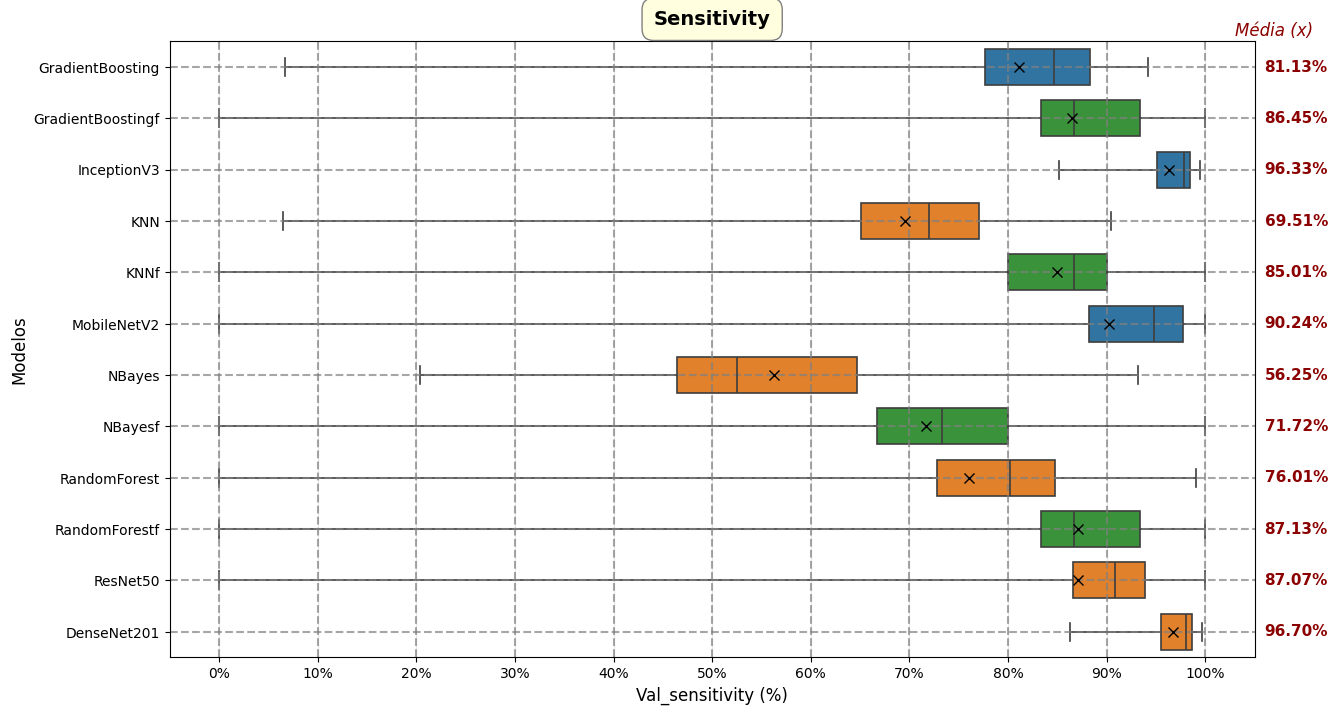

/tmp/ipykernel_144775/3811401464.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f"{attribute}",


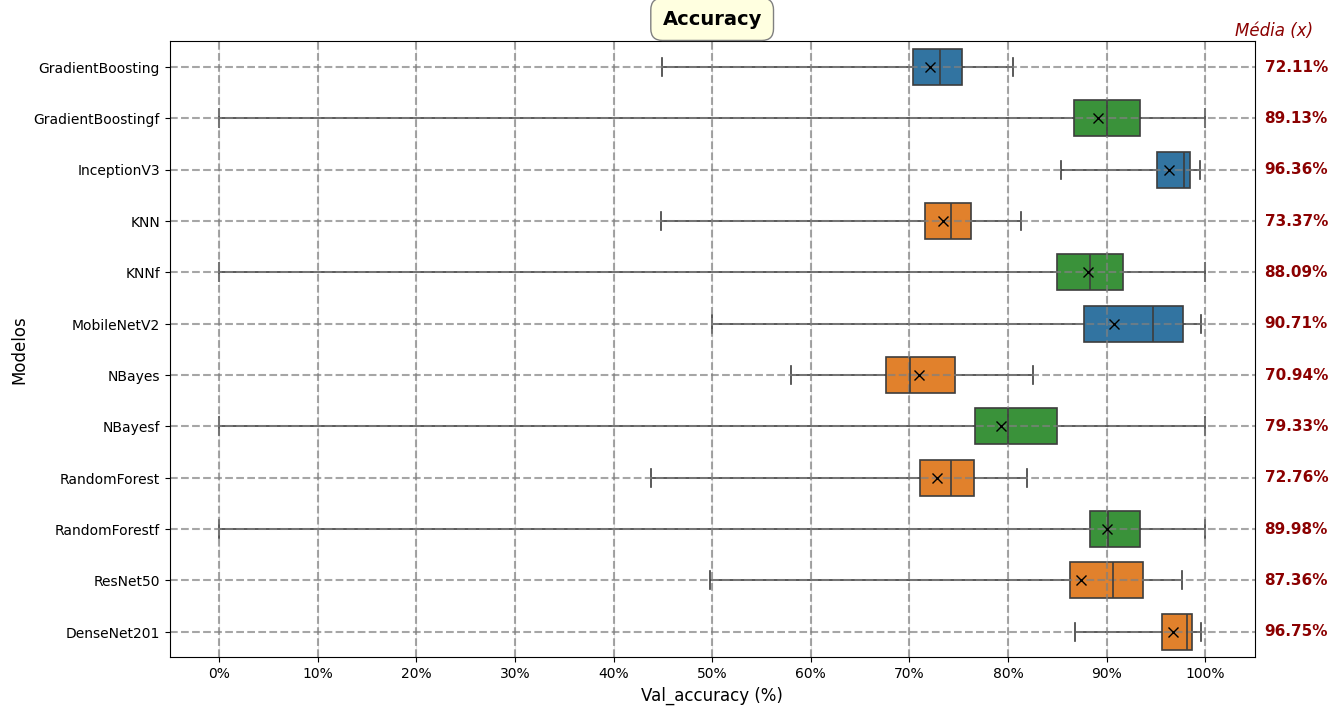

/tmp/ipykernel_144775/3811401464.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f"{attribute}",


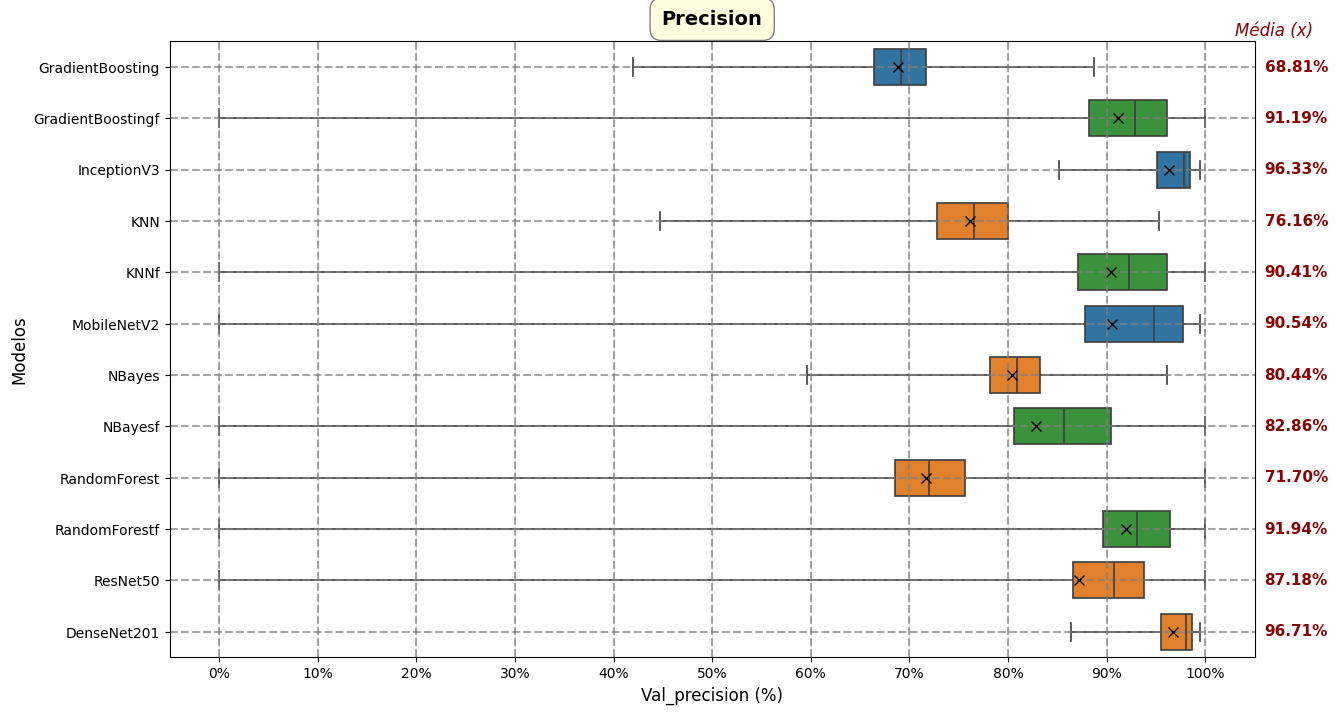

/tmp/ipykernel_144775/3811401464.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f"{attribute}",


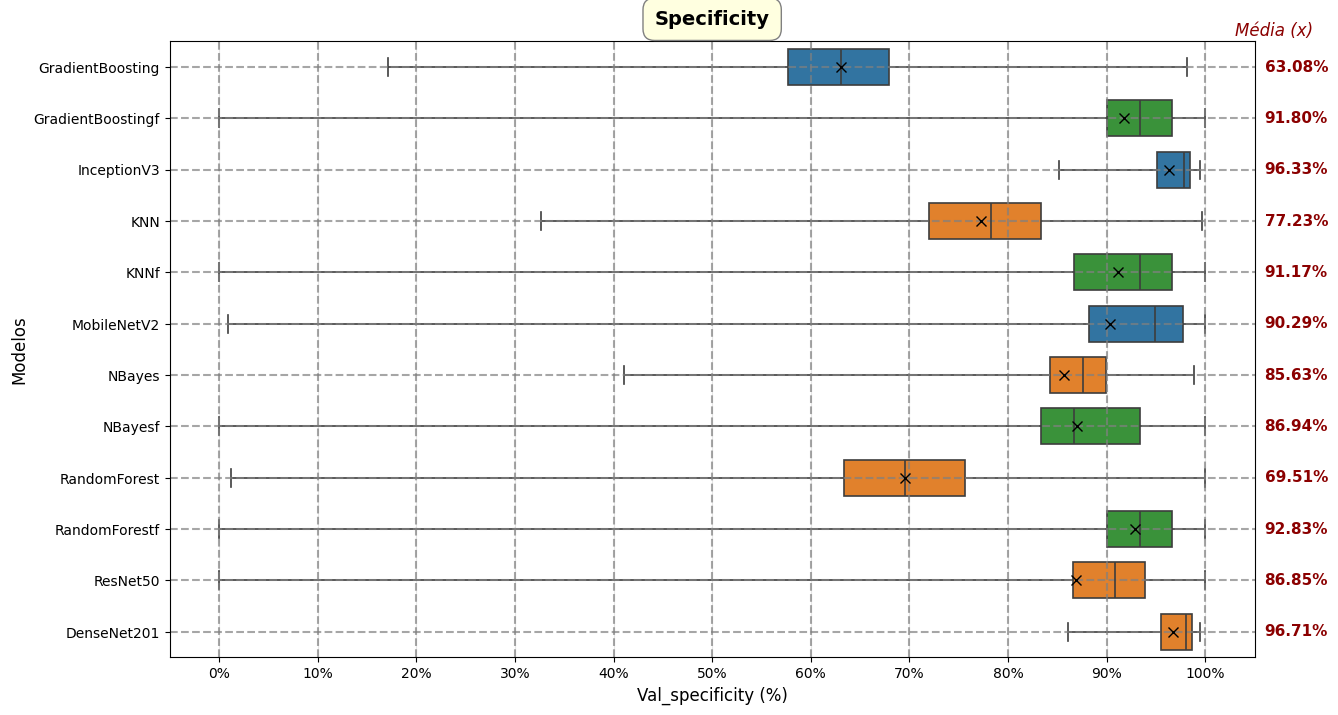

/tmp/ipykernel_144775/3811401464.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f"{attribute}",


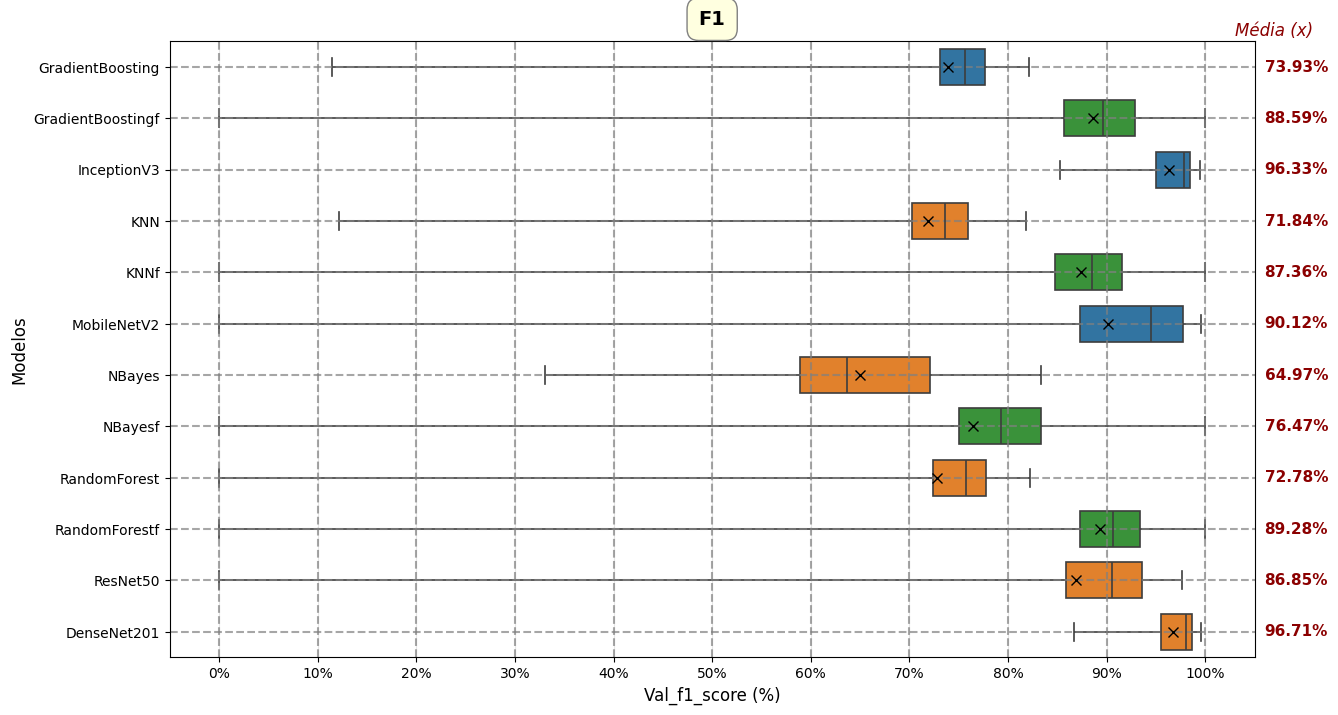

/tmp/ipykernel_144775/3811401464.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f"{attribute}",


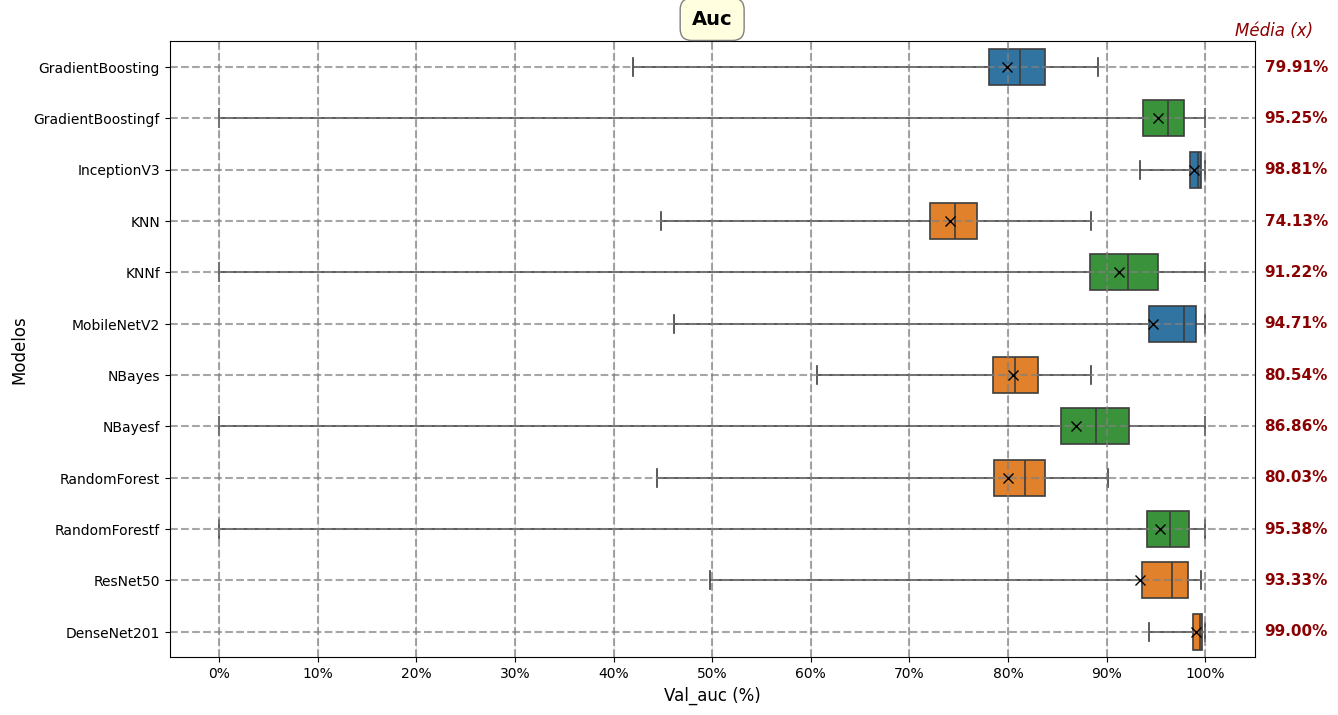

In [41]:
# Colunas a serem plotadas
COLUMNS = ["val_sensitivity", "val_accuracy", "val_precision", "val_specificity", 
           "val_f1_score", "val_auc"]

# Gerar gráficos
for column in COLUMNS:
    boxplot(df, column)